In [ ]:
'''In what state will you make the most as a data scientist?
   California, as expected, offers the highest salaries but considering
   Traffic and cost of living it might not be the best choice!
'''

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters
df = pd.read_csv('cleanTest.csv')


In [81]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_studio,spark,aws,excel
0,Data Scientist,$110K-$182K\n(Glassdoor est.),Data Scientist\n\n\nJOB DESCRIPTION\n\nLooking...,3.9,Quantum Reservoir Impact\n3.9,"Houston, TX",-1,51 to 200 Employees,2007,Company - Private,...,146.0,Quantum Reservoir Impact\n,TX,0,13,1,0,0,1,1
1,Data Analyst,$46K-$65K\n(Glassdoor est.),"For more than a decade, Asembia has been worki...",3.5,"Asembia, LLC.\n3.5","Florham Park, NJ",-1,501 to 1000 Employees,2004,Company - Private,...,55.5,"Asembia, LLC.\n",NJ,0,16,0,0,0,1,1
2,Senior Data Scientist,$86K-$137K\n(Glassdoor est.),GEICO’s Data Science team uses predictive anal...,3.3,Government Employees Insurance Company\n3.3,"Chevy Chase, MD",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,111.5,Government Employees Insurance Company\n,MD,0,84,1,0,1,1,1
3,Data Scientist,Employer Provided Salary:\n$80K-$120K,About ClearCut Analytics\nClearCut was founded...,5.0,ClearCut Analytics\n5.0,"Chicago, IL",-1,1 to 50 Employees,2016,Company - Private,...,100.0,ClearCut Analytics\n,IL,0,4,1,0,0,0,0
4,"Data Scientist - Statistics, Early Career",$68K-$111K\n(Glassdoor est.),*Organization and Job ID**\nJob ID: 310918\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Seattle, WA",-1,1001 to 5000 Employees,1965,Government,...,89.5,Pacific Northwest National Laboratory\n,WA,0,55,0,0,0,0,1


In [72]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_YesNo',
       'R_studio', 'spark', 'aws', 'excel'],
      dtype='object')

In [4]:
'''This looks for the job titles given in the search. Also the seniority level of the jobs'''

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return np.nan
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return np.nan

In [5]:
'''Simplified Job titles'''
df['job_simp'] = df['Job Title'].apply(title_simplifier)


In [6]:
df.job_simp.value_counts()

data scientist    29
analyst            7
data engineer      3
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

senior    8
jr        1
Name: seniority, dtype: int64

In [8]:
'''How many jobs are listed in each state?'''

df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

TX    7
VA    5
MA    4
NY    3
WI    3
UT    2
MD    2
WA    2
CA    2
CO    2
OH    1
NC    1
PA    1
MN    1
MO    1
KS    1
NJ    1
GA    1
DC    1
IL    1
IN    1
Name: job_state, dtype: int64

In [9]:
'''Each job comes with a description. this list how many characters are in the description''' 

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     2280
1     3239
2     4298
3     2673
4     5278
5     3260
6     1328
7     3160
8     5526
9     2866
10    1837
11    3963
12    4959
13    4812
14    6128
15    4583
16    3468
17    2447
18    3527
19    1806
20    5480
21    2407
22    4565
23    5630
24    3915
25    1954
26    3142
27    4195
28    2121
29    3189
30    4651
31    5964
32    5020
33    2836
34    3002
35    4086
36    3359
37    4076
38    3729
39    2692
40    4000
41    2728
42    2105
Name: desc_len, dtype: int64

In [10]:
'''#Competitor count
df['num_comp'] = df(str(['Competitors'])).apply(lambda x: len(x.split(',')) if x != '-1' else 0)'''

"#Competitor count\ndf['num_comp'] = df(str(['Competitors'])).apply(lambda x: len(x.split(',')) if x != '-1' else 0)"

In [11]:
'''I am looking at which jobs off salary and which offer an hourly wage. There we no results
    for hourly
    '''

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [12]:
df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,110,182
1,0,46,65
2,0,86,137
3,0,80,120
4,0,68,111
5,0,81,134
6,0,49,89
7,0,29,65
8,0,80,94
9,0,68,113


In [13]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'R_studio', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [14]:
'''Finds company names in the dataframe and replaces the values at the end of each name'''

df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [15]:
'''Company names'''

df['company_txt']

0                              Quantum Reservoir Impact
1                                         Asembia, LLC.
2                Government Employees Insurance Company
3                                    ClearCut Analytics
4                 Pacific Northwest National Laboratory
5                                    Avalere Health LLC
6                         Apollo Global Management, LLC
7                                 KCI Technologies Inc.
8                                     PatientPoint, LLC
9                          SpawGlass Construction Corp.
10                         Southwest Research Institute
11                             Grid Dynamics Consulting
12                       Airlines Reporting Corporation
13                                The MITRE Corporation
14                                            Visa Inc.
15                            DentaQuest Ventures, Inc.
16                                      TrialCard, Inc.
17       Midcontinent Independent System Operato

In [16]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_studio,spark,aws,excel,desc_len
count,43.000000,43.0,43.000000,43.0,43.0,43.000000,43.000000,43.000000,43.000000,43.0,43.000000,43.000000,43.0,43.000000,43.000000,43.000000,43.000000
mean,3.625581,-1.0,1973.953488,-1.0,0.0,0.023256,73.372093,117.674419,95.523256,0.0,46.046512,0.697674,0.0,0.232558,0.209302,0.534884,3634.511628
std,0.639603,0.0,45.646130,0.0,0.0,0.152499,26.550960,33.781314,29.029532,0.0,45.646130,0.464701,0.0,0.427463,0.411625,0.504685,1235.325316
min,1.900000,-1.0,1781.000000,-1.0,0.0,0.000000,12.000000,64.000000,47.000000,0.0,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,1328.000000
25%,3.200000,-1.0,1954.500000,-1.0,0.0,0.000000,52.000000,93.000000,74.250000,0.0,19.000000,0.000000,0.0,0.000000,0.000000,0.000000,2710.000000
50%,3.700000,-1.0,1989.000000,-1.0,0.0,0.000000,77.000000,117.000000,99.500000,0.0,31.000000,1.000000,0.0,0.000000,0.000000,1.000000,3468.000000
75%,4.000000,-1.0,2001.000000,-1.0,0.0,0.000000,88.000000,136.500000,110.500000,0.0,65.500000,1.000000,0.0,0.000000,0.000000,1.000000,4574.000000
max,5.000000,-1.0,2016.000000,-1.0,0.0,1.000000,131.000000,207.000000,169.000000,0.0,239.000000,1.000000,0.0,1.000000,1.000000,1.000000,6128.000000


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'R_studio', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

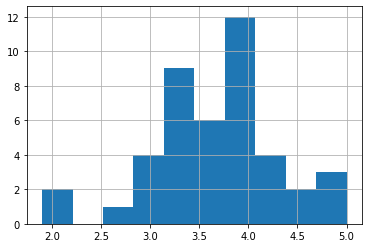

In [18]:
#company rating histogram
df.Rating.hist()

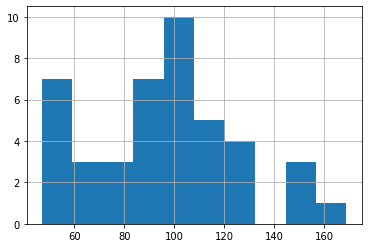

In [19]:
# average salary histogram
df.avg_salary.hist()

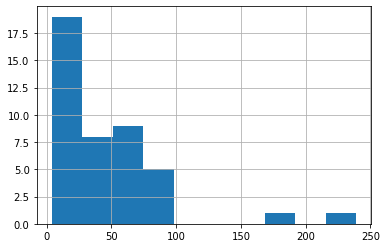

In [20]:
# companyage hist. somehting that was interesting is there is a Japanesse Phramacutical company 
# Takeda Pharmaceutical Company that is 240 years old
df.age.hist()

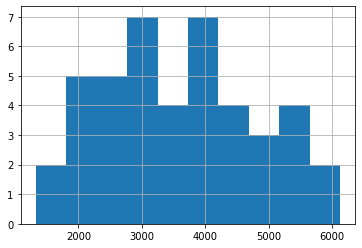

In [21]:
# this histogram visuallizes the character length of the job descriptions. 
# It isn't neccesarily valuable for financial reasons but it is another visualization
df.desc_len.hist()

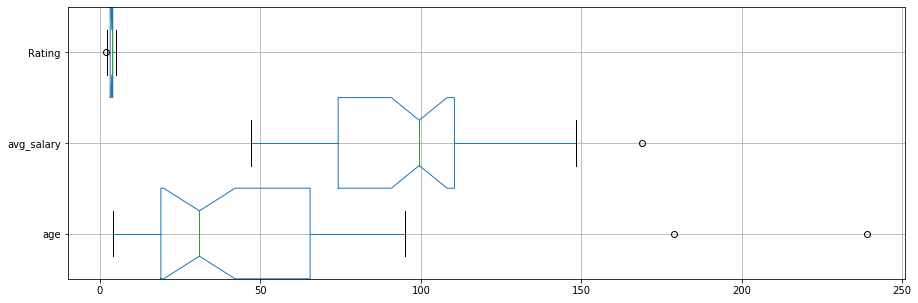

In [69]:
# this box and whisker plot shows average salary and age of company with outliers showing the peaks.
# the rating plot is small because the companies recieve a rating of 1-5 and when comparing to other values around
# 100k its left this box close together
df.boxplot(column = ['age','avg_salary','Rating'], notch=True,
          vert=False, widths = (1), figsize=(15,5), manage_ticks=True)

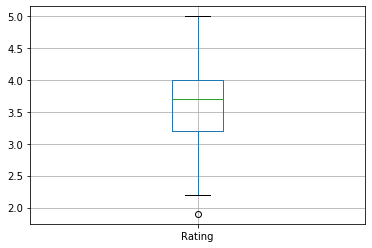

In [23]:
# this plot shows company rating and from that we see companies average around a 3.7 rating 
df.boxplot(column = ['Rating'])

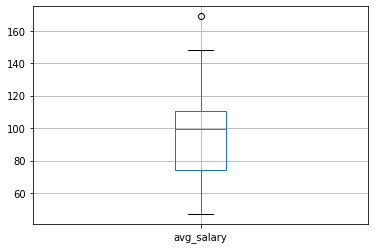

In [24]:
# this plot reflects average salary
df.boxplot(column = ['avg_salary'])

In [25]:
# correlation matrix
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.110935,-0.091951,-0.111687
avg_salary,0.110935,1.000000,0.109029,0.118002
Rating,-0.091951,0.109029,1.000000,0.020640
desc_len,-0.111687,0.118002,0.020640,1.000000


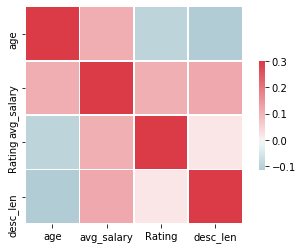

In [63]:
# colormap that shows how these 4 columns relate to eachother. 
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'R_studio', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [28]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt',
             'job_state','same_state', 'python_yn', 'R_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 35


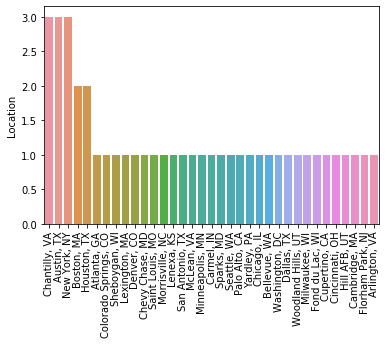

graph for Headquarters: total = 1


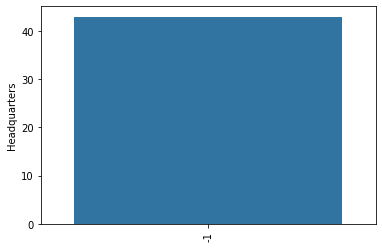

graph for Size: total = 7


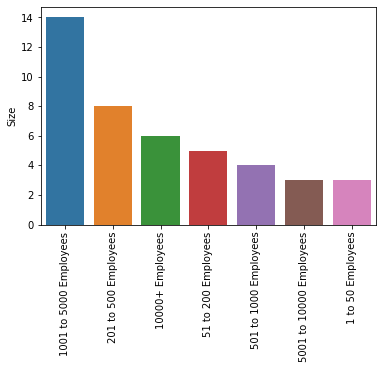

graph for Type of ownership: total = 5


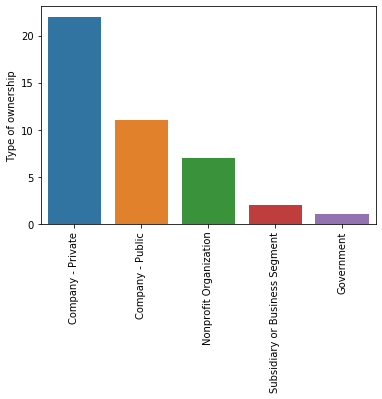

graph for Industry: total = 21


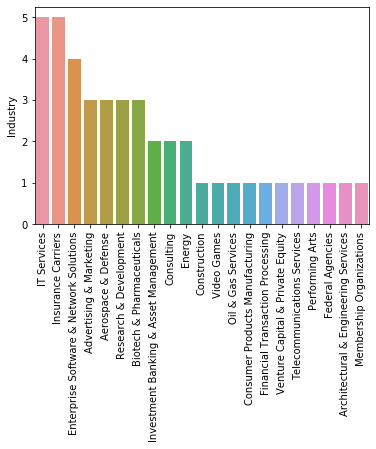

graph for Sector: total = 13


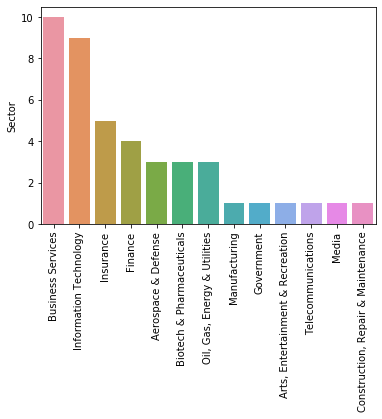

graph for Revenue: total = 12


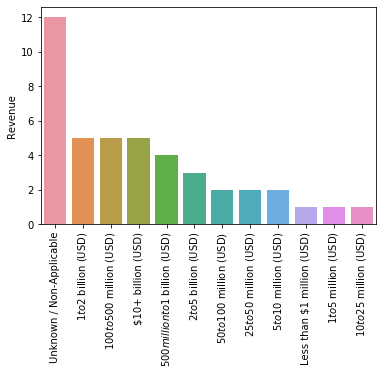

graph for company_txt: total = 43


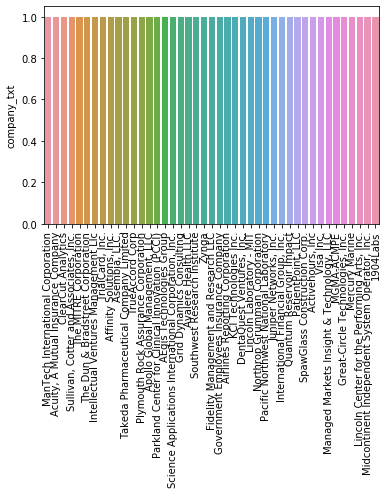

graph for job_state: total = 21


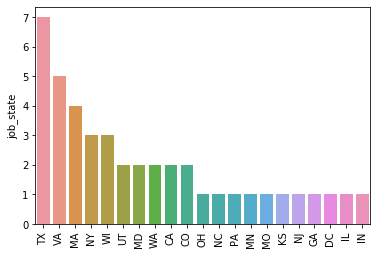

graph for same_state: total = 1


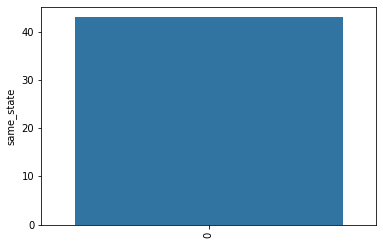

graph for python_yn: total = 2


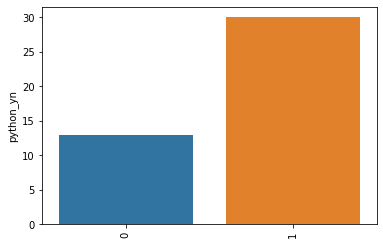

graph for R_studio: total = 1


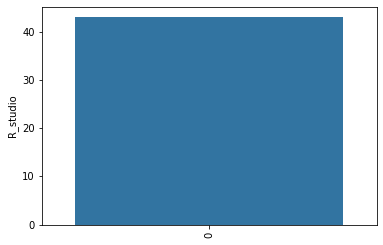

graph for spark: total = 2


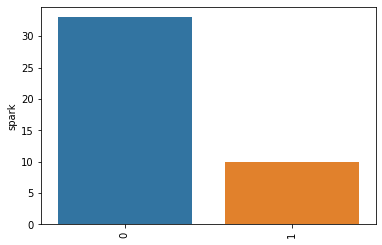

graph for aws: total = 2


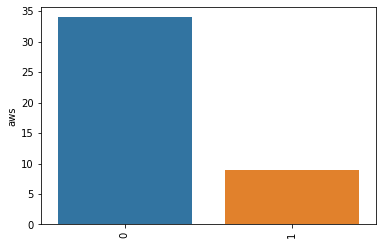

graph for excel: total = 2


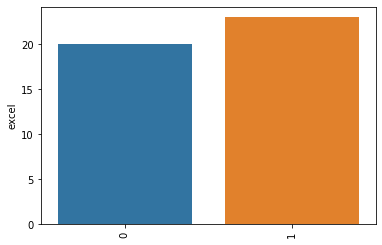

graph for job_simp: total = 3


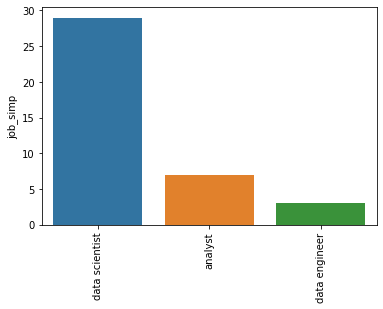

graph for seniority: total = 2


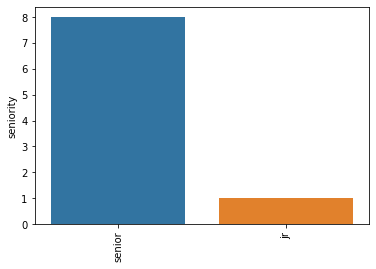

In [29]:
# these visualisations represent the concatinated column names. The headquarters graph shows that the only 
# company that listed Job Location and Company Headquarters were not in the same state.
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    

graph for Location: total = 20


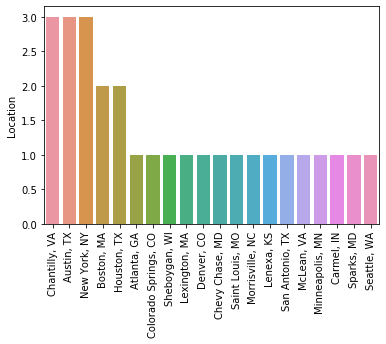

graph for Headquarters: total = 1


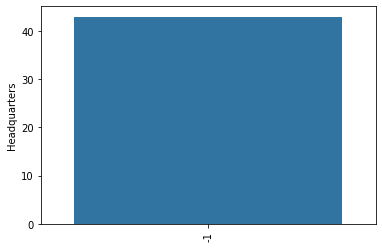

graph for company_txt: total = 20


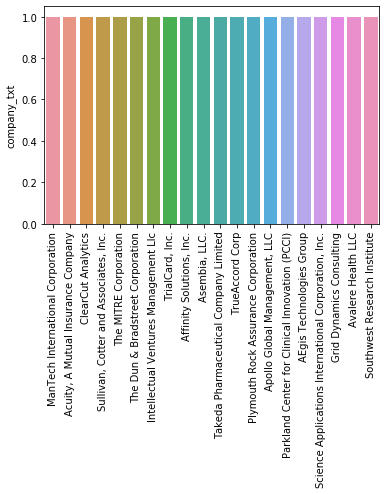

In [30]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'R_studio', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [32]:
# Pivot table showing average salary for job title
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')


,avg_salary
job_simp,
analyst,59.928571
data engineer,82.000000
data scientist,108.810345


In [33]:
# pivot table that show the average salary for job seniority title
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')


,,avg_salary
job_simp,seniority,
analyst,jr,53.500000
data scientist,senior,114.833333


In [34]:
# this pivot table shows average salary by state
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WI        data scientist      88.250
WA        data scientist      99.750
VA        data scientist      98.500
          data engineer      103.500
UT        data scientist      94.500
          analyst             69.000
TX        data scientist     142.000
          data engineer       90.500
PA        data scientist     107.000
OH        data scientist      87.000
NY        analyst             58.000
          data scientist     104.250
NJ        analyst             55.500
NC        analyst             49.000
MO        data scientist      99.500
MN        data scientist     108.000
MD        data scientist     111.500
MA        data scientist     101.875
KS        analyst             51.500
IN        analyst             83.000
IL        data scientist     100.000
GA        data scientist      96.500
DC        data scientist     107.500
CO        analyst             53.500
          data engineer       52.000
CA        data scientist     145.000

In [35]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [36]:
# pivot table that shows state titale and how many jobs in each offer a salary
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        data scientist           2
WA        data scientist           2
VA        data scientist           4
          data engineer            1
UT        data scientist           1
          analyst                  1
TX        data scientist           4
          data engineer            1
PA        data scientist           1
OH        data scientist           1
NY        analyst                  1
          data scientist           2
NJ        analyst                  1
NC        analyst                  1
MO        data scientist           1
MN        data scientist           1
MD        data scientist           1
MA        data scientist           4
KS        analyst                  1
IN        analyst                  1
IL        data scientist           1
GA        data scientist           1
DC        data scientist           1
CO        analyst                  1
          data engineer            1
CA        data scientist           2

In [37]:
# average salary by state
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,145.000
TX,142.000
MD,111.500
MN,108.000
DC,107.500
PA,107.000
NY,104.250
MA,101.875
IL,100.000


In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'R_studio', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [39]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_studio', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [40]:
# table that relates Company rating to Salary. Also which industries tend to have the highest salary
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
2.9     146.500000
4.2     116.500000
3.7     111.666667
3.9     108.000000
3.0     106.500000
4.8     104.500000
2.2     103.000000
5.0     100.000000
4.7      99.500000
3.8      98.000000
4.0      96.166667
3.2      85.928571
3.3      81.500000
3.5      81.000000
4.4      76.250000
2.6      58.000000
1.9      53.500000
4.1      52.000000
3.6      47.000000
Industry
                                         avg_salary
Industry                                           
Video Games                                  148.50
Oil & Gas Services                           146.00
Telecommunications Services                  121.00
IT Services                                  120.80
Federal Agencies                             111.00
Consulting                                   107.75
Insurance Carriers                           103.70
Financial Transaction Processing             103.50
Research & Development                        98.00
Biotech & Pha

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [82]:
# this table shows companies Revenue weather the Job uses python and how many of those companies do
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')


python_yn,0,1
Revenue,,
$1 to $2 billion (USD),2.0,3.0
$1 to $5 million (USD),NaN,1.0
$10 to $25 million (USD),NaN,1.0
$10+ billion (USD),1.0,4.0
$100 to $500 million (USD),2.0,3.0
$2 to $5 billion (USD),1.0,2.0
$25 to $50 million (USD),1.0,1.0
$5 to $10 million (USD),1.0,1.0
$50 to $100 million (USD),1.0,1.0


In [ ]:
df.to_csv('eda.csv')